\
# - breast cancer prediction based on digitized imaged of breast tissue

Breast cancer is cancer that forms in the cells of the breasts.
After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.
Breast cancer survival rates have increased, largely due to earlier detection.
in our project we worked on data from kaggle of digitized image of a fine needle aspirate (FNA) of a breast mass.

in the data there are 30 features, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
Target class:
         - Malignant
         - Benign
         
         
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQjuiDaPbVi3jtsh-uepYaqpN-iX3SuDAmiIg&usqp=CAU=" width=900 height=900 />




# import libraries 

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd  # Import Pandas for data manipulation using dataframes
import numpy as np  # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt  # Import matplotlib for data visualisation
import seaborn as sns  # Statistical data visualization
# %matplotlib inline

# Import Cancer data drom the Sklearn library

In [2]:
data = pd.read_csv(r"BreastCancerDetection.csv")

# VISUALIZING THE DATA

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


B    357
M    212
Name: diagnosis, dtype: int64


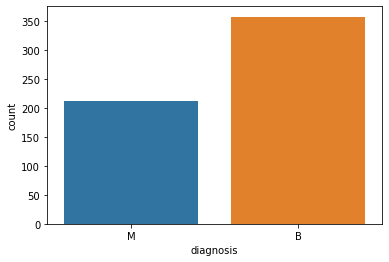

In [5]:
data["diagnosis"]
print(data["diagnosis"].value_counts())
sns.countplot(data['diagnosis'], label = "Count") 

In [6]:
#remove id and Unnamed: 32
data=data.iloc[:,1:-1]
data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

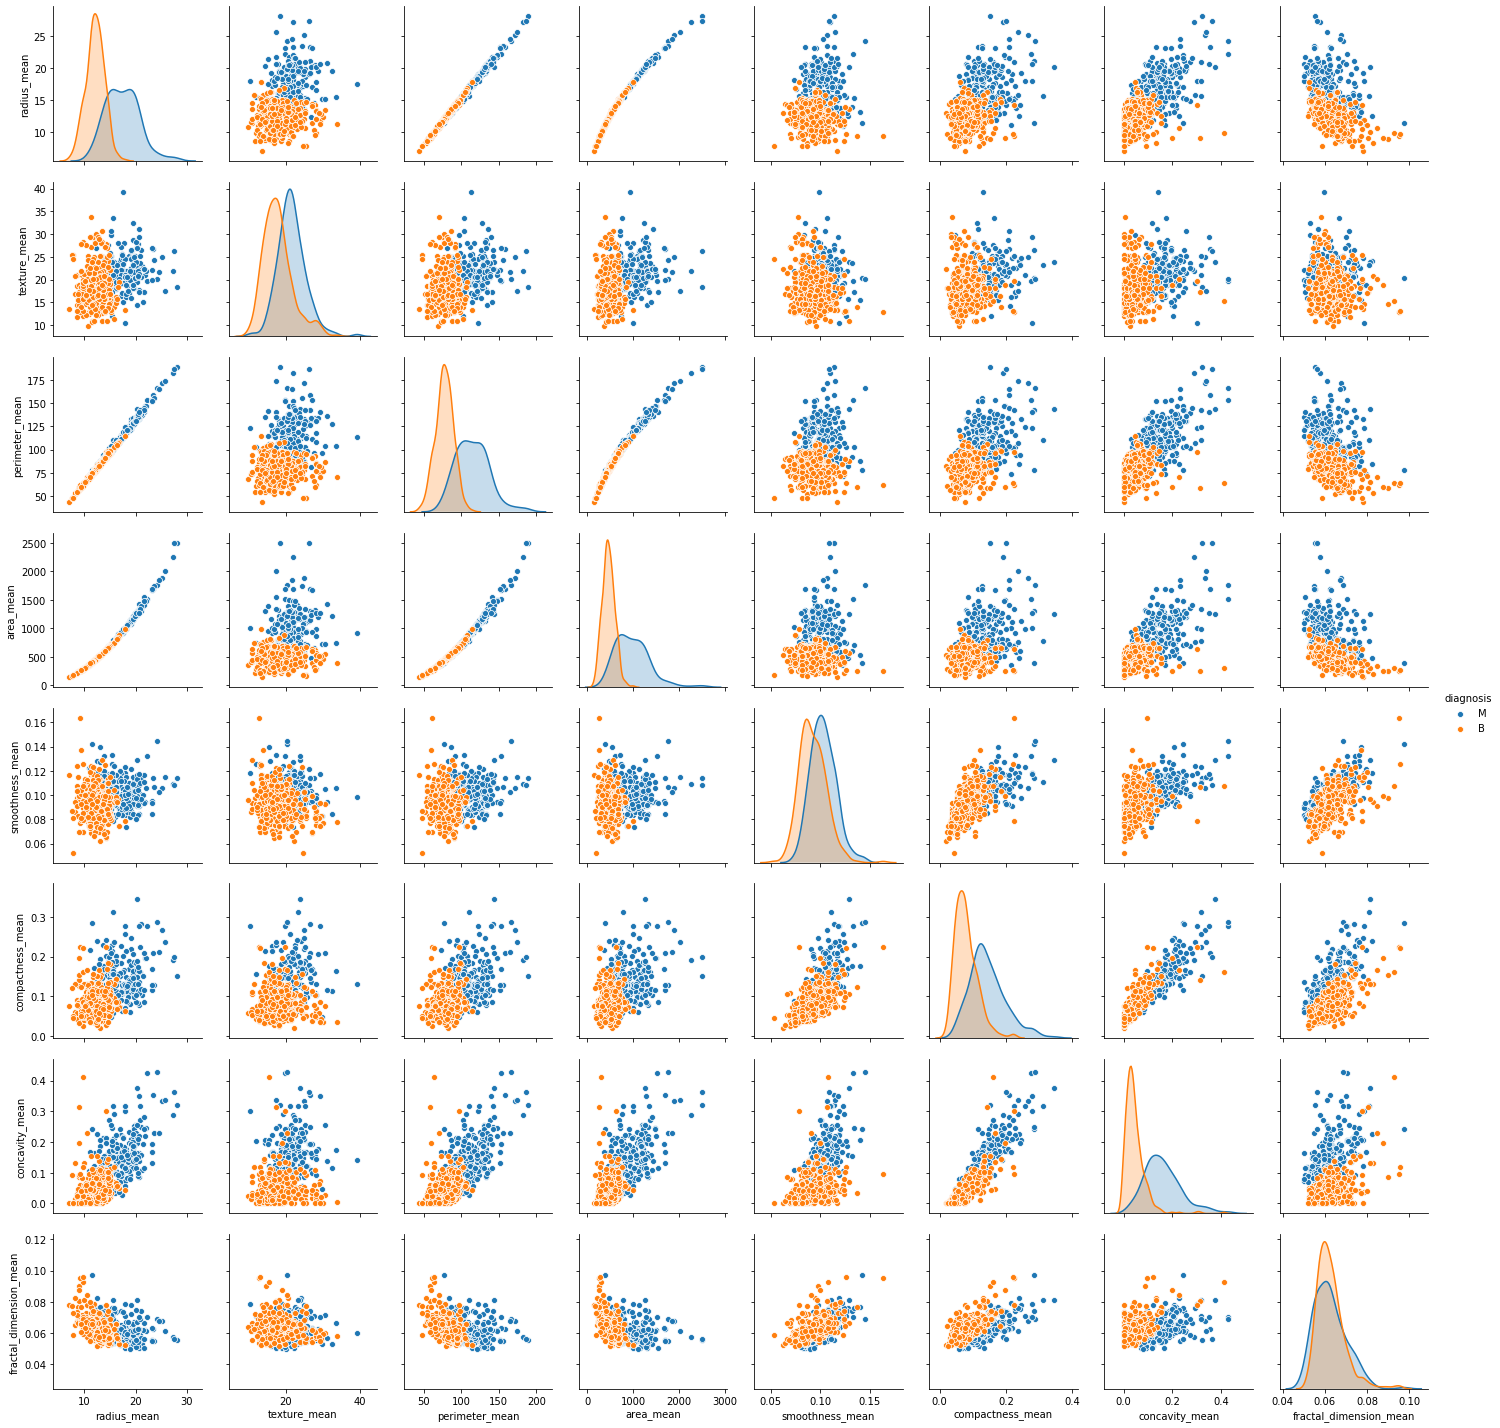

In [7]:
sns.pairplot(data, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'fractal_dimension_mean',] )

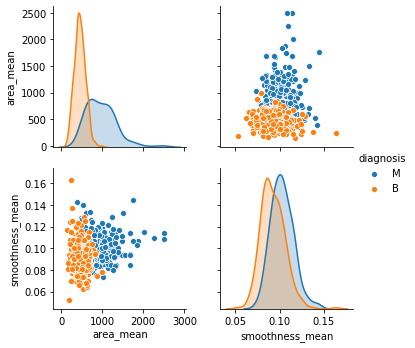

In [8]:
sns.pairplot(data, hue = 'diagnosis', vars = [
       'area_mean', 'smoothness_mean', ] )

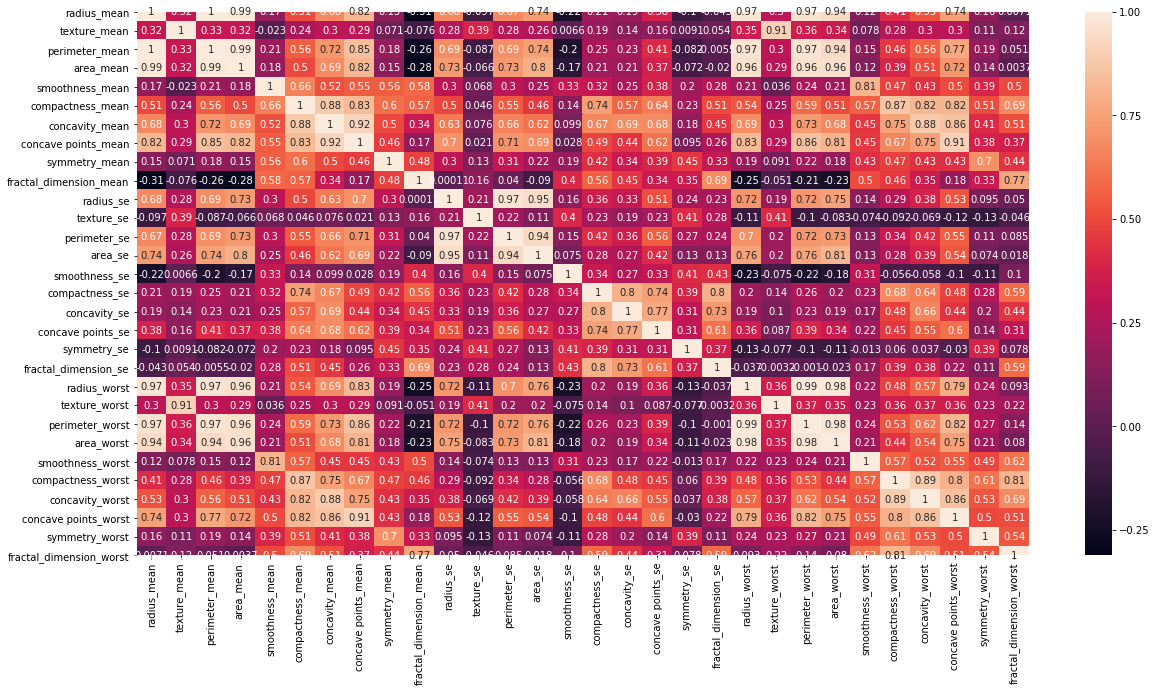

In [9]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True)

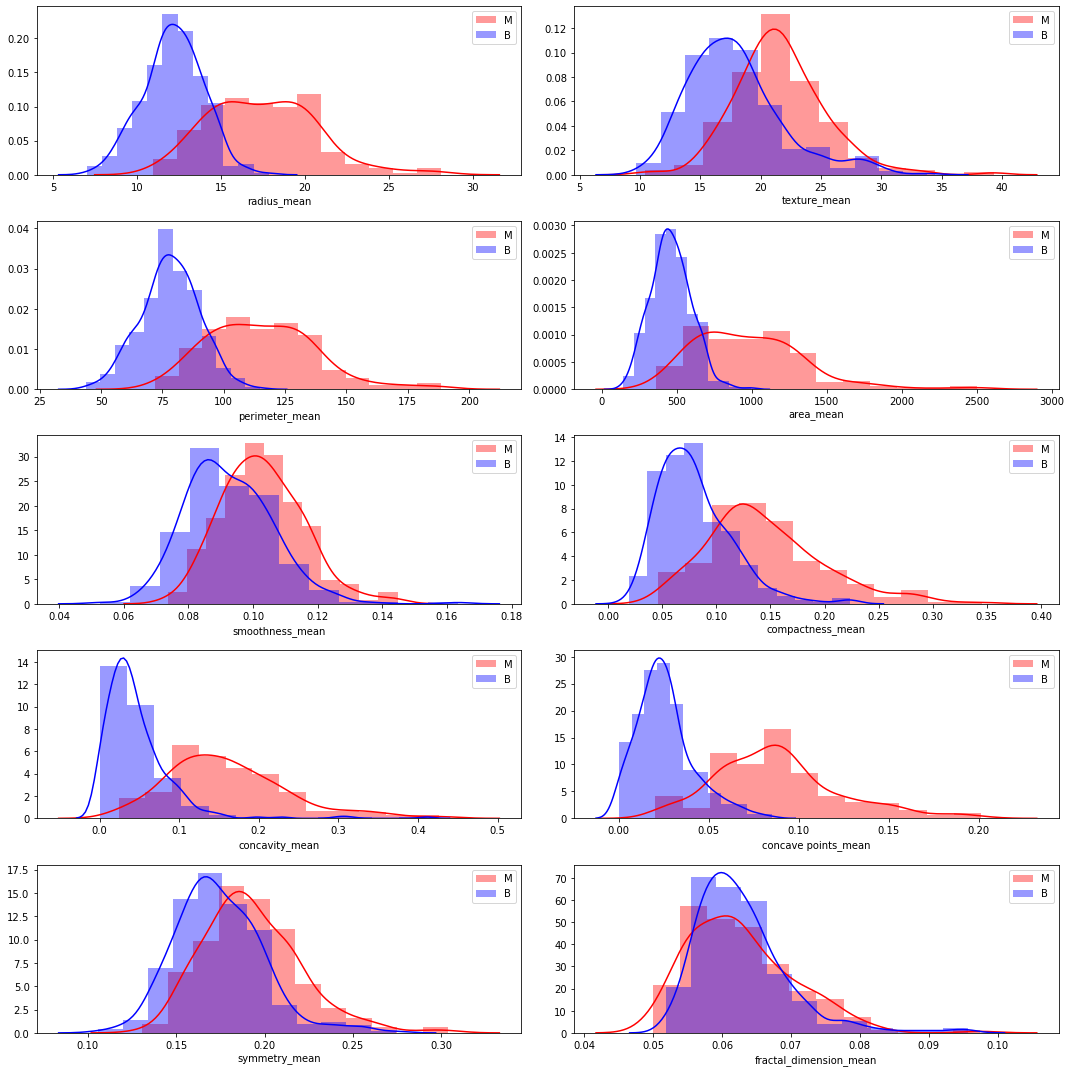

In [10]:
bins = 12
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
features_mean= list(data.columns[1:11])

plt.figure(figsize=(15,15))

for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

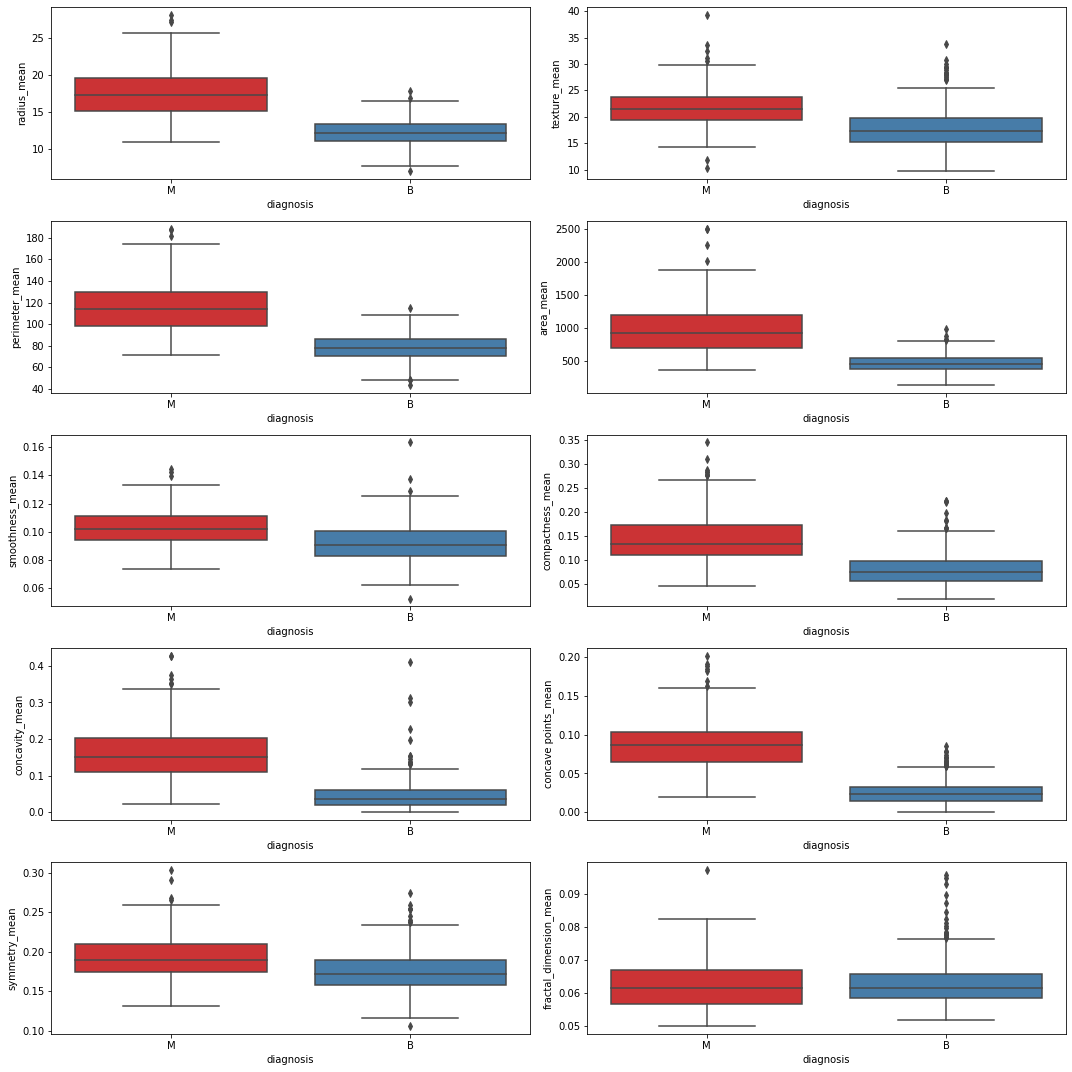

In [11]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

# Models 

# Split the data

In [12]:
#looking for exceptions
from scipy.stats import zscore

z = np.abs(zscore(data.iloc[:,1:]))

X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

#normalize the data
X_standard = X.apply(zscore)

#split into test and train group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

In [13]:
X_train.shape

(426, 30)

In [14]:
X_test.shape

(143, 30)

first we try some models from sklearn:

# # SVM

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


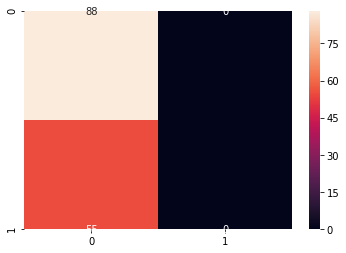

In [15]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

#define model
svc_model = SVC()
svc_model.fit(X_train, y_train)

#evaluate model
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.62      1.00      0.76        88
           M       0.00      0.00      0.00        55

    accuracy                           0.62       143
   macro avg       0.31      0.50      0.38       143
weighted avg       0.38      0.62      0.47       143



/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Improve the model

In [17]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.634, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.631, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.634, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.631, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [19]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [20]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        88
           M       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



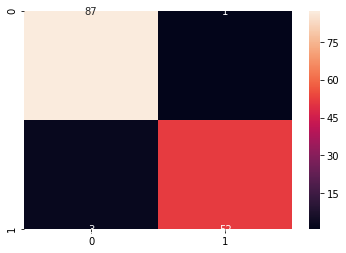

In [21]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

# KNN 

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        88
           M       1.00      0.87      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



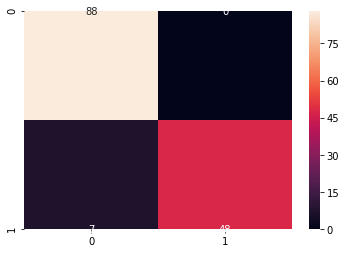

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#define model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

#evaluate model
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predict))

# K means

In [23]:
X_area_mean = data['area_mean']
X_smoothness_mean=data["smoothness_mean"]
X_radius_mean= data["radius_mean"]
y = data['diagnosis']

# decision_tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [25]:
feature_importances

,importance
concave points_worst,0.716267
area_worst,0.099616
perimeter_se,0.028365
concavity_worst,0.027071
texture_mean,0.021603
radius_worst,0.019006
perimeter_worst,0.014410
fractal_dimension_mean,0.014410
area_se,0.009956
fractal_dimension_se,0.009862


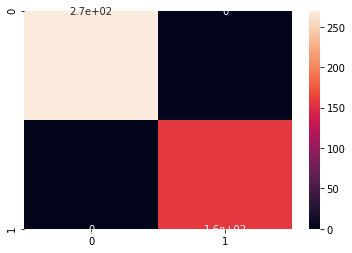

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           B       0.93      0.95      0.94        88
           M       0.92      0.89      0.91        55

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



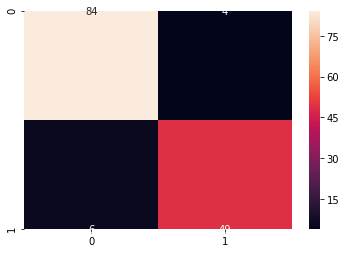

In [27]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

# extra tree classtifier

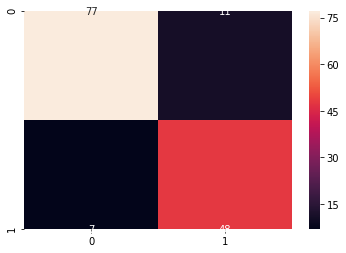

In [28]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
try_model = ExtraTreeClassifier(random_state=1)

# Fit model
try_model.fit(X_train, y_train)

#check prediction
y_predict = try_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

# Random Forest

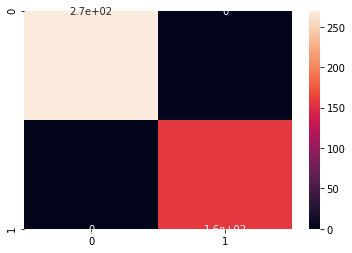

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           B       0.97      1.00      0.98        88
           M       1.00      0.95      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



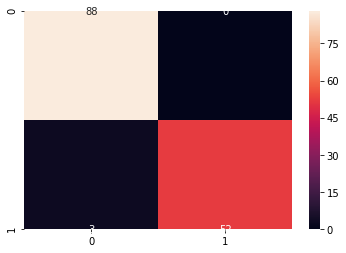

In [30]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

# Naive Bayes

In [31]:
from sklearn.preprocessing import StandardScaler
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
y = data['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

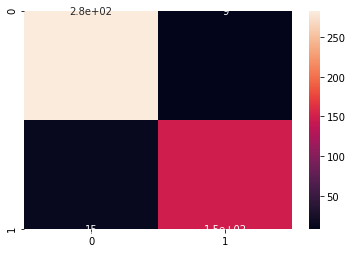

In [32]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

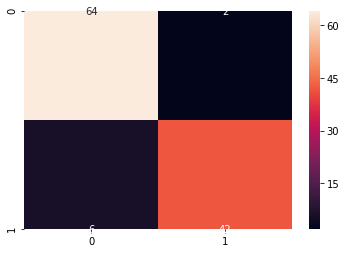

In [33]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.95      0.88      0.91        48

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [35]:
sum(y_test)

48

# Logistic Regression

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

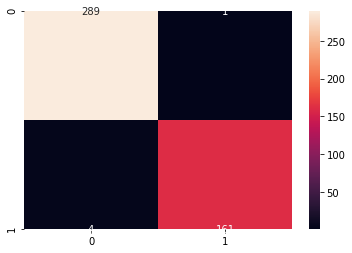

In [37]:
y_predict_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

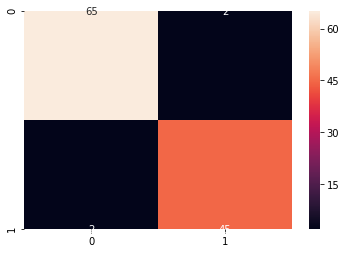

In [38]:
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# neural network multi layer perspetron

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


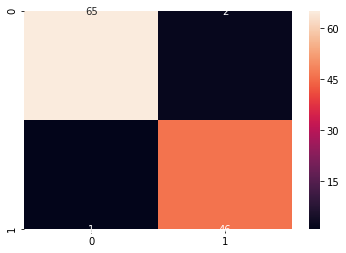

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
try_model = MLPClassifier()

# Fit model
try_model.fit(X_train, y_train)

#check prediction
y_predict = try_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

In [41]:
  from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# bernuli&linear regression

[BernoulliRBM] Iteration 1, pseudo-likelihood = -64.83, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -123.16, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -181.52, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -240.13, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -298.90, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -357.78, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -416.73, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -475.71, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -534.71, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -593.74, time = 0.01s
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.82      0.89      0.86        47

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.8

'The accuracy is 0.88     The f1_score is 0.87'

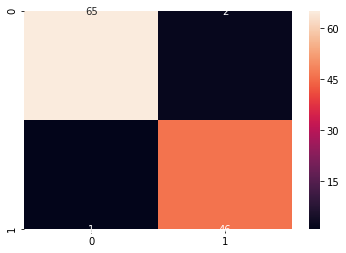

In [42]:
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# Define model. Specify a number for random_state to ensure same results each run
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Fit model
rbm_features_classifier.fit(X_train, y_train)

#check prediction
y_predict = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_predict)))


sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# Gradient Decent 

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
start = time.time()
accuracy_selection=[]
cvs_selection=[]

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SGD Classifier Accuracy: 95.61%
Cross validation score: 96.48% (+/- 1.12%)
Execution time: 0.012574 seconds 



# creating a combined model using 3 models
    trying to get better result using few model together

In [44]:
data = pd.read_csv(r"BreastCancerDetection.csv")
data =data.iloc[:,1:-1]
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

FileNotFoundError: [Errno 2] File b'/kaggle/input/breast-cancer-wisconsin-data/data.csv' does not exist: b'/kaggle/input/breast-cancer-wisconsin-data/data.csv'

In [ ]:
d = pd.get_dummies(y)
y = d.drop('M', axis=1)
y

# svc

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

# Define model
svc_model = SVC()

# Fit model
svc_model.fit(X_train, y_train)

#check prediction
y_predict1 = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict1)

sns.heatmap(cm,annot=True,fmt="d")

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict1)
f1 = f1_score(y_test, y_predict1, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# neural network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
neuro_model = MLPClassifier()

# Fit model
neuro_model.fit(X_train, y_train)

#check prediction
y_predict2 = neuro_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict2)

sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict2)
f1 = f1_score(y_test, y_predict2, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# bernouliRBM

In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# Define model. Specify a number for random_state to ensure same results each run
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Fit model
rbm_features_classifier.fit(X_train, y_train)

#check prediction
y_predict3 = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_predict3)))

cm = confusion_matrix(y_test, y_predict3)
sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict3)
f1 = f1_score(y_test, y_predict3, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

<h1> combined model

In [ ]:
y_predict=y_predict1+y_predict2+y_predict3

y_predict

In [ ]:
y_predict=y_predict//2
y_predict

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

we can see that using combined model didn't imrove our results

# VISUALISING PCA AND TENSERFLOW PLOTS

In [ ]:
# # Convert the diagnosis column to numeric format
# data['diagnosis'] = data['diagnosis'].factorize()[0]
# # Fill all Null values with zero
# data = data.fillna(value=0)
# # Store the diagnosis column in a target object and then drop it
# target = data['diagnosis']
# data = data.drop('diagnosis', axis=1)

In [ ]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [ ]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

In [ ]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# PCA

In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_



In [ ]:
explained_variance

In [ ]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, y_pred))

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))



In [ ]:
X2.ravel().shape

In [ ]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).shape

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors

# z = np.exp(-X1**2-X2**2)*1.5+0.2

# colors = ["red", "blue"]
# cmap= matplotlib.colors.ListedColormap(colors)
# boundaries=[z.min(), 0.35, 0.7, 1.05, 1.4, z.max()]

# m = plt.contourf(X1, X2, z, levels = boundaries, cmap=cmap)

# plt.colorbar(m, spacing="proportional")
# plt.show()

In [ ]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), cmap = ListedColormap(("red","blue")))



after working on few models of sklearn we endeep little bit more and work on model with tensorflow and pytorch

# Keras and Tenserflow 

In [ ]:
x_standard = X.apply(zscore)
x_standard.describe()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.3, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.7, random_state=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
def baseline_model(units1, units2, dropout):
    model = Sequential()
    model.add(Dense(units1, input_shape=(30,), activation='relu'))
    model.add(Dropout(dropout))
    model.add(BatchNormalization(axis=1))
    model.add(Dense(units2, activation='relu', activity_regularizer=l2(0.01), kernel_regularizer=l2(0.01)))
    model.add(Dropout(dropout))
    model.add(BatchNormalization(axis=1))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
#stop the training if arriving to good results
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')

In [ ]:
units1 = 128
units2 = 128
dropout = 0.25
 
# Fit the model
model = baseline_model(units1, units2, dropout)

history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(x_val,y_val), 
                    callbacks=[es])

In [ ]:
loss, acc = model.evaluate(x_train, y_train)
loss, acc = model.evaluate(x_val, y_val)
loss, acc = model.evaluate(x_test, y_test)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
y_pred = model.predict(x_test)
y_pred = np.array([0 if n <= .5 else 1 for n in y_pred])
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt="d")
acc = accuracy_score(y_test, y_pred)
print('The accuracy is: %.2f' % acc)
print('f1 score : %.2f '% f1_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Yuval's Tenserflow

In [ ]:
x_standard = X.apply(zscore)
x_standard.describe()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
#units = (30+1)/2
# result is binary - 1
#X_train shape is (6000,11) 
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 32, epochs = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

#y_pred = (y_pred > 0.5)



In [ ]:
y_pred = classifier.predict(x_test)

y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(y_pred.shape)
print(y_test.shape)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Loop - Get best paramiters 

In [ ]:
# #def baseline_model(units1, units2, dropout):

# best_i=1
# best_j=1
# best_d=1
# best_loss=1.0
# best_acc=0.0

# best_batch_size=1
# best_epochs=1

# for i in range(1,128):
#     for j in range(1,128):
#         for d in range(1,100,5):
#             model= baseline_model(i, j, d/100)
#             history = model.fit(x_train, y_train, 
#                     batch_size=32, 
#                     epochs=50, 
#                     validation_data=(x_val,y_val), 
#                     callbacks=[es])
            
# #            
#             loss, acc = model.evaluate(x_test, y_test)
#             print("the best yet are:")
#             print("best i %d the best j is %d the best d is %d " %(best_i,best_j,best_d) )
#             print('The best accuracy is: %.2f loss is  %.2f ' %(acc,loss)) 
            
#             if(best_loss>loss and best_acc<acc):
#                 best_loss=loss 
#                 best_acc=acc
#                 best_i=i
#                 best_j=j
#                 best_d=d
#                 print("-----------------------------------------------new score")
#                 print('The accuracy is: %.2f loss is  %.2f ' %(acc,loss)) 
            

In [ ]:
# print(i,j,d)
# print("best results", 
# best_i,
# best_j,
# best_d,
# best_loss,
# best_acc)

# looking for the best hyperparameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping


# Early stopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   mode='auto')

 # create model
    
def baseline_model(units1, units2, dropout):
  model = Sequential()
  model.add(Dense(units1, input_shape=(30,), activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(units2, activation='relu', activity_regularizer=l2(0.01), kernel_regularizer=l2(0.01)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(1, activation='sigmoid'))
 
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
  model.summary()
 
  return model

In [ ]:
unit1 = np.arange(0, 512, 20)
unit2 = np.arange(0, 512, 20)
dropouts= np.arange(0, 20, 0.1)

In [ ]:
summary=[]
for un1 in np.arange(0, 600, 100):
    for un2 in np.arange(0, 600, 100):
        for dr in np.arange(0.1, 0.6, 0.1):
        
      
           # Name the test model
           name = 'unit1=_{}_unit2=_{}_dropout={}'.format(un1,un2,dr)
           print(name)

           # build the model
           model = baseline_model(un1,un2,dr)
        
           # Fit the model
           history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=100, batch_size=32, verbose=1, callbacks=[es])
        
           # Plot the history
           #plot_history(history,name,'acc')
        
           #plot_history(history,name,'loss')
       
           # Print the summary values
           val_loss, val_acc = model.evaluate(x_test,y_test)
        
           summary.append('Summary: val_loss: {}, val_acc: {}'.format(val_loss, val_acc)) 
print(summary)

# removing exceptional data and checking again the models


In [ ]:
#cutting first column
data2=data.iloc[:,1:]
chart = sns.boxplot(x="variable", y="value", data=pd.melt(data2))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [ ]:
from scipy.stats import zscore
z0 = data2.apply(zscore)
z = np.abs(zscore(data2))
z0

In [ ]:
z[0]
data.keys()

In [ ]:
#removing exeptional points
z_in = (np.abs(zscore(data2)) < 3)
data_clean = data2[z_in.all(axis=1)]

In [ ]:
data_clean

# pytorch

# version 1 

In [ ]:
cols = data.columns
y_data = data[cols[1]] #diagnosis
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))
y_data[:5], le.classes_ 

In [ ]:
x_data = Variable(torch.from_numpy(x_data.values))
y_data = Variable(torch.from_numpy(y_data))

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = Model()
y_pred = model(x_data.float())

y_pred

In [ ]:
x_data.float().size(), y_data.float().size() 

In [ ]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epochs in range(500):
    y_pred = model(x_data.float())
    loss = criterion(y_pred, y_data.view(-1,1).float())
    print('Epoch',epochs,'Loss:',loss.item(), '- Pred:', y_pred.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#The error function is the function representing the difference between the values 
#computed by your model and the real values. In the optimization field often they
#speak about two phases: a training phase in which the model is set,
#and a test phase in which the model tests its behaviour against the real values of output.
#In the training phase the error is necessary to improve the model, 
#while in the test phase the error is useful to check if the model works properly.

#The objective function is the function you want to maximize or minimize. 
#When they call it "cost function" (again, it's the objective function)
#it's because they want to only minimize it. 
#I see the cost function and the objective function as the same thing seen from slightly 
#different perspectives.

#The "criterion" is usually the rule for stopping the algorithm you're using.
#Suppose you want that your model find the minimum of an objective function,
#in real experiences it is often hard to find the exact minimum and the algorithm 
#could continuing to work for a very long time. In that case you could accept to 
#stop it "near" to the optimum with a particular stopping criterion.

In [ ]:
x_data.data[0]>0.5

In [ ]:
model.double().forward(x_data.data[25]) > 0.5, y_data[25]

In [ ]:
model.double().forward(x_data.data[25])

In [ ]:
x_data.data[25]>0.5

In [ ]:
model.double().forward(x_data.data[55]) > 0.5, y_data[55]

In [ ]:
pred = model.double().forward(x_data) > 0.5
pred.numpy()[:5]

In [ ]:
a = pred.numpy()
b = y_data.numpy()
pred.numpy().reshape(-1).shape, y_data.numpy().shape

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);

In [ ]:
print(classification_report(a,b))

# Version 2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
data.isnull().sum()

In [ ]:
data['diagnosis']=np.where(data['diagnosis']=='M',1,0)
data

In [ ]:
X=data.iloc[:, 2:-1].values
y=data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

X_test.shape

In [ ]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=30,hidden1=100,hidden2=100,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [ ]:
torch.manual_seed(20)
model=ANN_Model()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
optimizer

In [ ]:
epochs=1000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
final_losses[0].item()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);
cm

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

#  Neural Net from First Principals

In [ ]:
#Now, let's normalized our feature vector.  We will force the mean of each column to 0, and divide by the maximum
X_mean = np.mean(X,axis=1,keepdims=True) #Find the mean of each feature
X_max = np.max(X,axis=1,keepdims=True) #Find the maximum of each feature
X_normalized = (X-X_mean)/(X_max) #Normalizing our dataset by subtracting the mean and dividing by the max

In [ ]:
#Now, let's split our dataset into two segments
# 1) Training set to train our neural net
# 2) A cross validation set to test the accuracy of our neural net

#We'll take the first 380 samples for our training set
X_train = X_normalized[:,:380]
Y_train = Y[:,:380]

#We will take the remaining 189 for our cross-validation set
X_cv = X_normalized[:,381:]
Y_cv = Y[:,381:]

In [ ]:
#We will now define our sigmoid function to be used in the output layer of our neural network (L3)
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
#We will now define our tanh(x) function to be used in hidden layers of our neural network (L1, L2)
#Note that the tanh(x) function allows better centering of data than the sigmoid function.  This is why it will be used in our hidden layers.

def tanh(z):
    s = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return s

In [ ]:
#Now, let's define our forward propogation function.
def forward_prop(X,W1,W2,W3,b1,b2,b3):
    
    #First layer forward propogation
    Z1 = np.dot(W1,X)# where W1 represents our matrix of weights in L1, and X represents our feature matrix of measures
    A1 = tanh(Z1 + b1) #where b1 represents our intercept term for our first layer
    #Second layer forward propogation
    Z2 = np.dot(W2,A1) #where W2 represents our matrix of weights in L2
    A2 = tanh(Z2 + b2) # where b2 represents our intercept term for our second layer
    #Third layer forward propogation
    Z3 = np.dot(W3,A2) #where W3 represents our matrix of weights in L3
    #where b3 represents our intercept term for our second layer
    A3 = sigmoid(Z3 + b3) #A3 will produce our probability vector
    
    cache = {    
                  "Z1": Z1,
                  "A1": A1,
                  "Z2": Z2,
                  "A2": A2,
                  "Z3": Z3,
                  "A3": A3
            }
    return cache

In [ ]:
#Now we will perform gradient descent for our neural network in the following steps:
#1) Start by randomly initializing our weight and intercept parameters
#2) Run forward propogation through our neural network
#3) Calculate the derivatives of our weights and intercept parameters via back propogation
#4) Refine our parameters using derivatives from (3)
#5) Reiterate 1 - 4 

def gradient_descent(iterations,X,Y,alpha):
    
    #Randomly initialized our parameters before running the algorithm
    W1 = np.random.randn(3,30)*0.01
    b1 = np.random.rand(3,1)
    W2 = np.random.randn(2,3)*0.01
    b2 = np.random.rand(2,1)
    W3 = np.random.rand(1,2)*0.01
    b3 = np.random.rand(1,1)
    dummy,m = X.shape
    
    caches = [] #we will store our cost at each iteration in this array
    count_vector = [] #We will store our iteration count in this array
    count = 0
    
    for i in range (1,iterations):
        
            count = count + 1
            
            count_vector.append(count)
        
            params = forward_prop(X,W1,W2,W3,b1,b2,b3) #forward propogation using our parameters
            
            #Define our values to be used in back propogation using the dictionary of values created from running forward_prop
            Z1 = params['Z1']
            Z2 = params['Z2']
            Z3 = params['Z3']
            A1 = params['A1']
            A2 = params['A2']
            A3 = params['A3']
            
            #Define our cost function, append the cost of each iteration to caches
            cost = -(1 / m)*np.sum(np.multiply(Y,np.log(A3)) + np.multiply((1-Y),np.log(1-A3)))
            caches.append(cost)
            
            #Back propogation for layer 3
            dA3 = -Y/A3 + (1-Y)/(1-A3)
            dZ3 = dA3 * sigmoid(Z3)*(1-sigmoid(Z3))
            dW3 = (1 / m)*np.dot(dZ3,A2.T)
            db3 = (1 / m)*np.sum(dZ3,axis=1,keepdims=True)
            
            #Back propogation for layer 2
            dA2 = np.dot(W3.T,dZ3)
            dZ2 = dA2*(1-np.power(tanh(Z2),2))
            dW2 = (1 / m)*np.dot(dZ2,A1.T)
            db2 = (1 / m)*np.sum(dZ2,axis=1,keepdims=True)
            
            #Back propogation for layer 1
            dA1 = np.dot(W2.T,dZ2)
            dZ1 = dA1*(1-np.power(tanh(Z1),2))
            dW1 = (1 / m)*np.dot(dZ1,X.T)
            db1 = (1 / m)*np.sum(dZ1,axis=1,keepdims=True)
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            W1 = W1 - alpha*dW1
            W2 = W2 - alpha*dW2
            W3 = W3 - alpha*dW3
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            b1 = b1 - alpha*db1
            b2 = b2 - alpha*db2
            b3 = b3 - alpha*db3
        
    return W1,W2,W3,b1,b2,b3,count_vector,caches

In [ ]:
#Lets see if our algorithm is working.  We should see a declining learning curve with iteration, which eventually flatterns out
#This will help us determine the appropriate number of iterations to run to determine the appropriate parameters
#Note: we will use a learning rate of 0.5 for now

W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(1000,X_cv,Y_cv,0.5)

plt.plot(count,caches,label='Cost')

plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.title("Cost vs. Iteration")

plt.legend()

plt.show()

In [ ]:
def predict(X,Y,iterations,alpha,X_train,Y_train):

    W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(iterations,X_train,Y_train,alpha)
    
    Z1 = np.dot(W1,X)
    A1 = tanh(Z1 + b1)
    Z2 = np.dot(W2,A1)
    A2 = tanh(Z2 + b2)
    Z3 = np.dot(W3,A2)
    A3 = sigmoid(Z3 + b3)
    
    dummy,m = A3.shape
    Y_prediction = np.zeros((1, m))
    
    for i in range(m):
        
        Y_prediction[0, i] = 1 if A3[0, i] > 0.5 else 0
        
    return Y_prediction

In [ ]:
#Lets see how accurate the predictions made by our neural network are compared to the training set and cross validation set
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(X_train,Y_train,1000,0.5,X_train,Y_train) - Y_train)) * 100))
print("Cross validation accuracy: {} %".format(100 - np.mean(np.abs(predict(X_cv,Y_cv,1000,0.5,X_train,Y_train) - Y_cv)) * 100))

In [ ]:
dummy,m1 = X_train.shape
dummy,m2 = X_cv.shape

train_predict = predict(X_train,Y_train,1000,0.5,X_train,Y_train)
CV_predict = predict(X_cv,Y_cv,1000,0.5,X_train,Y_train)
count_true_pos = 0
count_train_pos = 0

count_true_pos_cv = 0
count_cv_pos = 0

for i in range (1,m1):
    if train_predict[0,i] == 1 and Y_train[0,i] == 1:
        count_true_pos = count_true_pos + 1
    if Y_train[0,i] == 1:
        count_train_pos = count_train_pos + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 1 and Y_cv[0,i] == 1:
        count_true_pos_cv = count_true_pos_cv + 1
    if Y_cv[0,i] == 1:
        count_cv_pos = count_cv_pos + 1
        
print(str(count_true_pos) + " positives predicted on the training set")
print(str(count_train_pos) + " true positives are in the training set")
print("The accuracy of true positives on the training set is: {} %".format(100-np.abs(100*((count_true_pos - count_train_pos)/count_train_pos))))
print("----------------------------------------------------------------")
print(str(count_true_pos_cv) + " positives predicted on the cross validation set")
print(str(count_cv_pos) + " true positives are in the cross validation set")
print("The accuracy of true positives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_pos_cv - count_cv_pos)/count_true_pos_cv))))

In [ ]:
count_true_neg = 0
count_train_neg = 0

count_true_neg_cv = 0
count_cv_neg = 0

for i in range (1,m1):
    if train_predict[0,i] == 0 and Y_train[0,i] == 0:
        count_true_neg = count_true_neg + 1
    if Y_train[0,i] == 0:
        count_train_neg = count_train_neg + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 0 and Y_cv[0,i] == 0:
        count_true_neg_cv = count_true_neg_cv + 1
    if Y_cv[0,i] == 0:
        count_cv_neg = count_cv_neg + 1
        
print(str(count_true_neg) + " negatives predicted on the training set")
print(str(count_train_neg) + " true negatives are in the training set")
print("The accuracy of true negatives on the training set is: {} %".format(100-np.abs(100*((count_true_neg - count_train_neg)/count_train_neg))))
print("----------------------------------------------------------------")
print(str(count_true_neg_cv) + " negatives predicted on the cross validation set")
print(str(count_cv_neg) + " true negatives are in the cross validation set")
print("The accuracy of true negatives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_neg_cv - count_cv_neg)/count_true_neg_cv))))